# Understanding avocado prices across time and regions

This dataset was downloaded from Kaggle, which was originally obtained from the Hass Avocado Board website in 05/2018 & compiled into a single CSV. 

FYI, the Hass variety accounts for the majority of avocados sold in the U.S. 

**Descriptions of certain columns**

`Date` - The date of the observation

`AveragePrice` - the average price of a single avocado

`type` - conventional or organic

`Region` - the city or region of the observation

`Total Volume` - Total number of avocados sold

`4046` - Total number of avocados with PLU 4046 sold (Small Hass)

`4225` - Total number of avocados with PLU 4225 sold (Large Hass)

`4770` - Total number of avocados with PLU 4770 sold (Extra Large Hass)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/avocado.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Cleaning the data

In [5]:
# Convert avocado type and region to categorical data

df['type'] = df['type'].astype('category')
df['region'] = df['region'].astype('category')

In [6]:
# Convert date to datetime datatype

df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info() # Check that datatypes have been converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  category      
 12  year          18249 non-null  int64         
 13  region        18249 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(2)
memory usage: 1.7 MB


In [8]:
# Remove column Unnamed:0
df.drop(columns=['Unnamed: 0'], inplace=True)

In [31]:
# Check for nulls
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [32]:
# Sort table by date
df.sort_values(by='Date', inplace=True)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


# Visualise the data

### Plot distribution of average avocado price

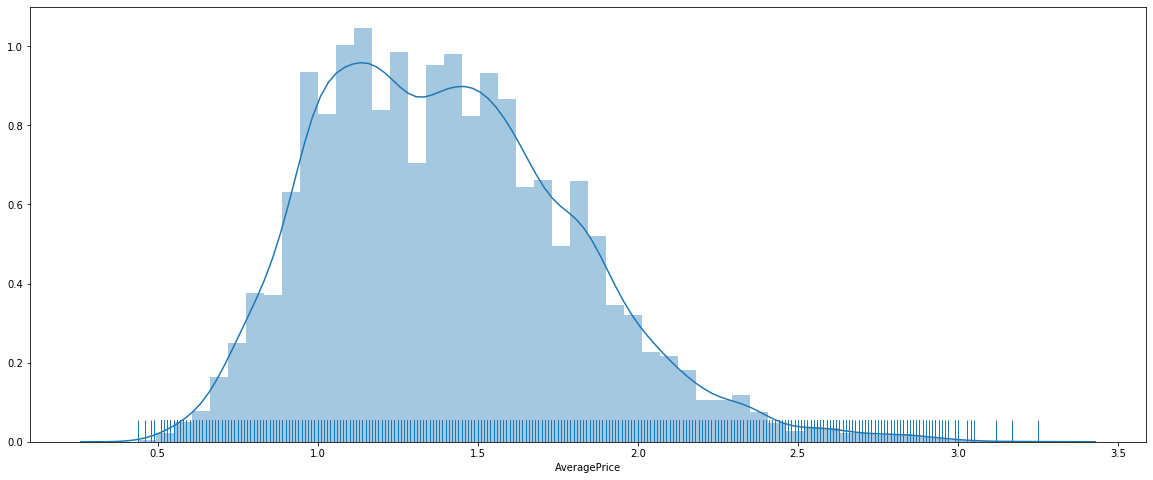

In [34]:
plt.figure(figsize=(20,8))
sns.distplot(df.AveragePrice, rug=True)

### Plot prices of conventional & organic avocado over time

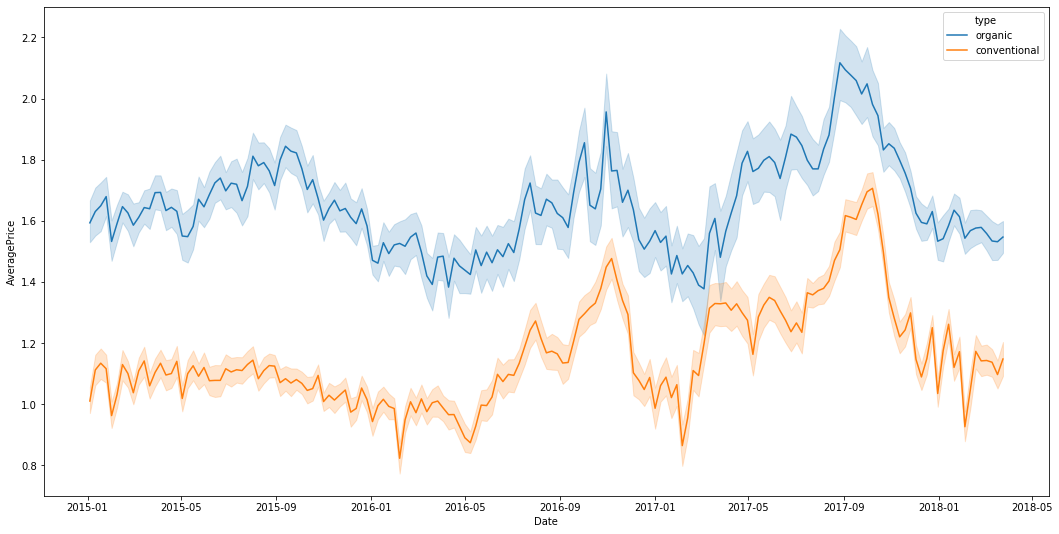

In [14]:
plt.figure(figsize=(18, 9))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type')

We can see that demand for avocado has fallen sharply in the past 9 months.

### Inspect seasonality in sales

In [45]:
df['month'] = df.Date.dt.month

In [62]:
df['month'].value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64

In [52]:
df_monthly = df.groupby('month').mean().reset_index()

In [53]:
df_monthly

,month,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1,1.311019,9.035654e+05,297091.451924,328309.637593,23469.554733,254693.975550,190706.250520,61666.720267,2321.004763,2016.500000
1,2,1.274387,1.018825e+06,356672.920885,348558.374931,28394.881146,285196.078073,213055.035712,68894.364792,3246.677569,2016.500000
2,3,1.332255,8.845054e+05,305386.962173,294504.626585,24952.196558,259658.362021,201308.615027,55152.129385,3197.617609,2016.411765
3,4,1.374380,8.801935e+05,314698.492251,291711.817500,25904.380947,247878.811068,189665.529252,55711.218697,2502.063120,2016.076923
4,5,1.346601,9.727150e+05,349946.910390,336679.188056,28377.930767,257710.995238,193425.140708,61144.593591,3141.260939,2015.928571
5,6,1.408964,9.293397e+05,337007.417141,302172.503879,28951.149985,261208.611175,202713.415943,53218.635417,5276.559815,2015.998454
6,7,1.462077,8.590482e+05,292245.798466,294714.809451,24521.787639,247558.728228,193294.104643,47831.054795,6433.567467,2016.071429
7,8,1.512514,8.036857e+05,290614.959295,282362.133625,19615.213554,211092.107201,166253.229174,41272.813348,3566.063967,2015.923077
8,9,1.572654,7.533192e+05,258561.835085,275712.053642,17425.176389,201618.164769,154073.842739,45327.096898,2217.225131,2016.000000
9,10,1.579683,6.803941e+05,215893.534597,251353.692341,17180.175635,195964.540364,145723.620754,48701.057348,1539.862262,2016.071429


([<matplotlib.axis.XTick at 0x7fa320fd2110>,
 <a list of 12 Text xticklabel objects>)

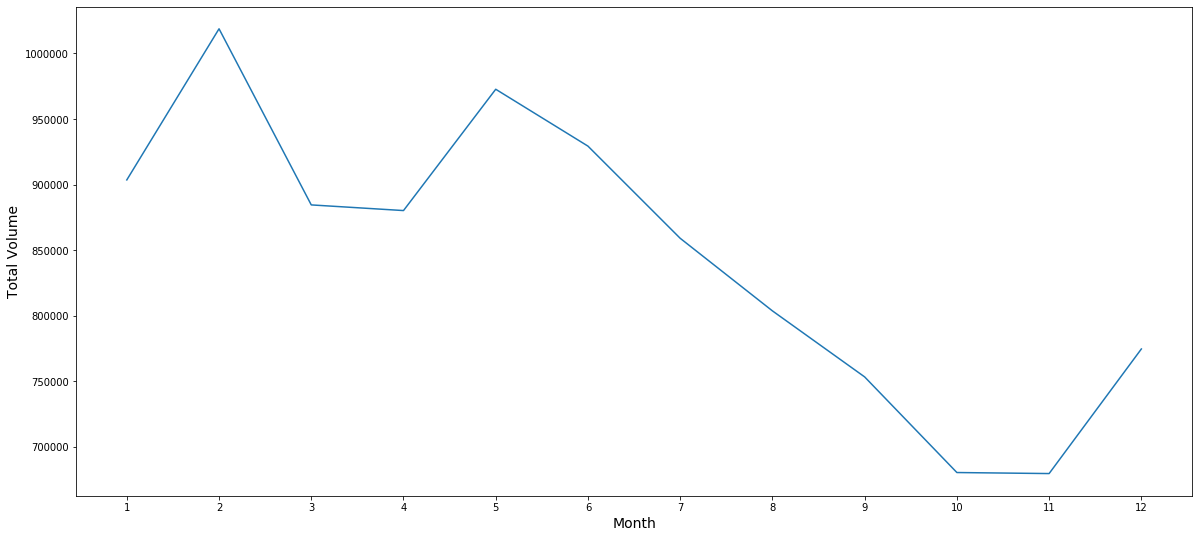

In [87]:
plt.figure(figsize=(20, 9))
sns.lineplot(data=df_monthly, x='month', y='Total Volume')
plt.xlabel('Month', size=14)
plt.ylabel('Total Volume', size=14)
# show all the xticks in graph
x = df_monthly.month
plt.xticks(x)

The steep decline in sales from May to October is slightly surprising, so I went to check the season for Hass avocados. Apparently, Hass avocados are in season from April - October, which does not explain why total sales fell specifically during this period. 

For now, this sales trend remains a mystery...let's put a pin on it and continue exploring the data.

### Historical sales for the 3 varieties of avocado 

Filter out the columns for Date and the 3 varieties of avocado:

In [15]:
df_variety = df.loc[:, ['Date', '4046', '4225', '4770']]

In [16]:
df_variety.head()

,Date,4046,4225,4770
11569,2015-01-04,9307.34,3844.81,615.28
9593,2015-01-04,1189.35,15628.27,0.00
10009,2015-01-04,161.68,206.96,0.00
1819,2015-01-04,3013.04,35456.88,1561.70
9333,2015-01-04,1.27,1129.50,0.00


Melt the table into a long format for easier plotting of graph:

In [17]:
df_variety_melt = pd.melt(df_variety, id_vars=['Date'], var_name='Variety', value_name='Quantity')

In [18]:
# Sum up the quantities for all regions and group them by date

df_variety_melt = df_variety_melt.groupby(['Date', 'Variety']).agg({'Quantity': 'sum'}).reset_index()

In [19]:
df_variety_melt.head()

,Date,Variety,Quantity
0,2015-01-04,4046,33098258.74
1,2015-01-04,4225,36851038.43
2,2015-01-04,4770,2278818.64
3,2015-01-11,4046,31024164.99
4,2015-01-11,4225,32808429.84


Text(0.5, 1.0, 'Total quantity sold for each variety of Avocado')

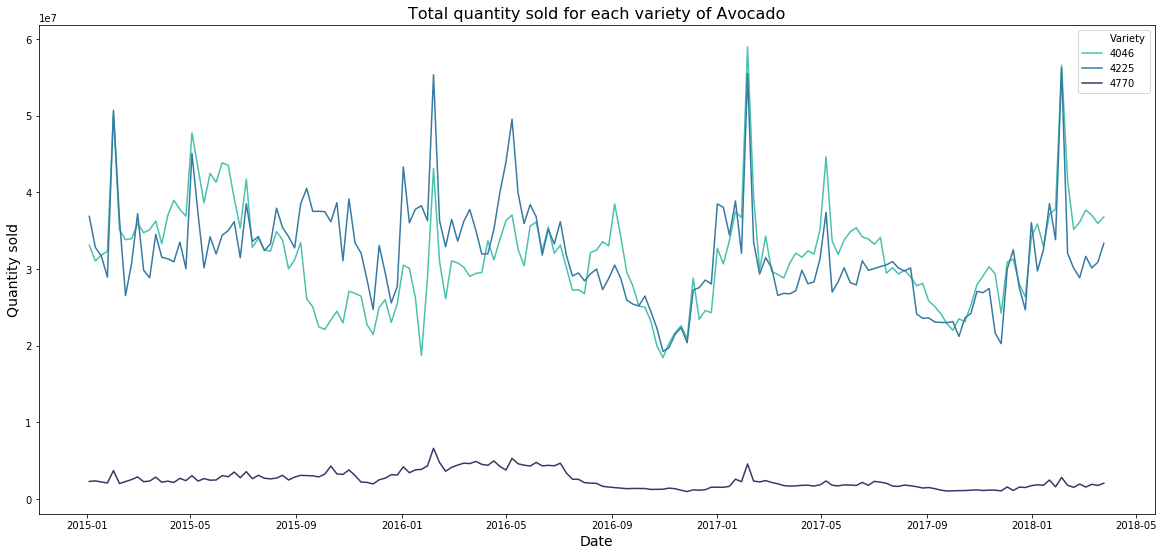

In [20]:
# legend='full' means every group will get an entry in the legend. 
# Otherwise, Seaborn will create extra numeric legends

plt.figure(figsize=(20, 9))
palette = sns.color_palette("mako_r", 3)
sns.lineplot(data=df_variety_melt, x='Date', y='Quantity', hue='Variety', legend='full', palette=palette)
plt.xlabel('Date', size=14)
plt.ylabel('Quantity sold', size=14)
plt.title('Total quantity sold for each variety of Avocado', size=16)

From the graph, we can see that the sales of varieties 4046 and 4225 (small and large Hass) follow a similar pattern, while 4770 (extra large Hass) is consistently much less popular. 

Evidently, smaller avocados are more popular, although the reason for this is not yet clear. One guess might be that smaller avocados are more convenient for consumption as it is a better serving size for one person.

# Diving down into the regional level

### Average price of avocados in each region

In [70]:
# Create a pivot table for average price in each region
region_avg_price = pd.pivot_table(df, values='AveragePrice', index='region', aggfunc=np.mean).reset_index()
region_avg_price

,region,AveragePrice
0,Albany,1.561036
1,Atlanta,1.337959
2,BaltimoreWashington,1.534231
3,Boise,1.348136
4,Boston,1.530888
5,BuffaloRochester,1.516834
6,California,1.395325
7,Charlotte,1.606036
8,Chicago,1.556775
9,CincinnatiDayton,1.209201


Text(34.5, 1.35, 'US average price = $1.32')

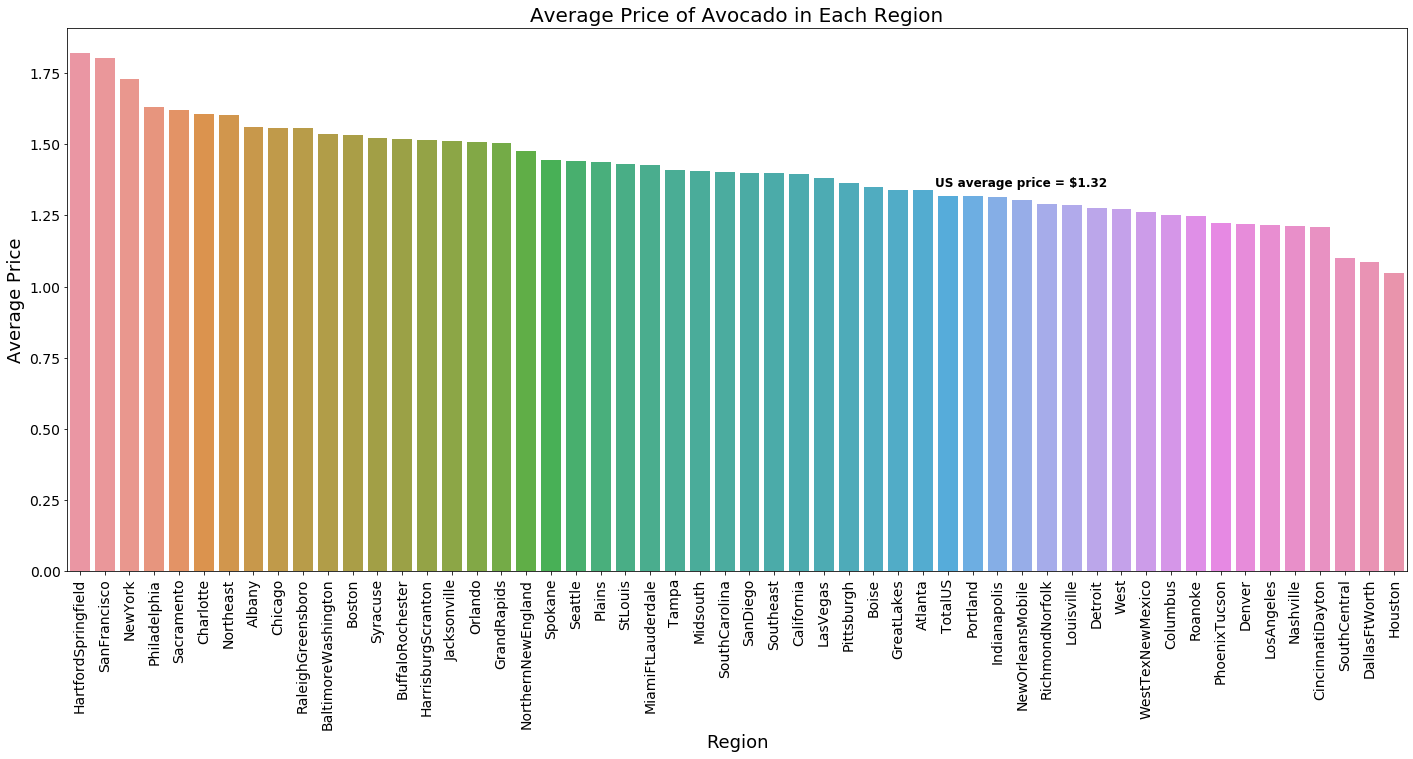

In [84]:
plt.figure(figsize=(24,10))
p1 = sns.barplot(data=region_avg_price, 
            x='region', 
            y='AveragePrice', 
            order=region_avg_price.sort_values('AveragePrice', ascending=False).region
            )
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.xlabel('Region', size=18)
plt.ylabel('Average Price', size=18)
plt.title('Average Price of Avocado in Each Region', size=20)


# add text annotation
p1.text(34.5, 1.35, "US average price = $1.32", horizontalalignment='left', size='large', color='black', weight='semibold')


In [30]:
# Create a pivot table for average of total volume in each region
region_vol = pd.pivot_table(df, values='Total Volume', index='region', aggfunc=np.mean).reset_index()
region_vol.head()

# Filter out TotalUS
region_vol = region_vol[region_vol['region'] != 'TotalUS']

Text(0.5, 1.0, 'Average of Total Volume of Avocados Sold in Each Region')

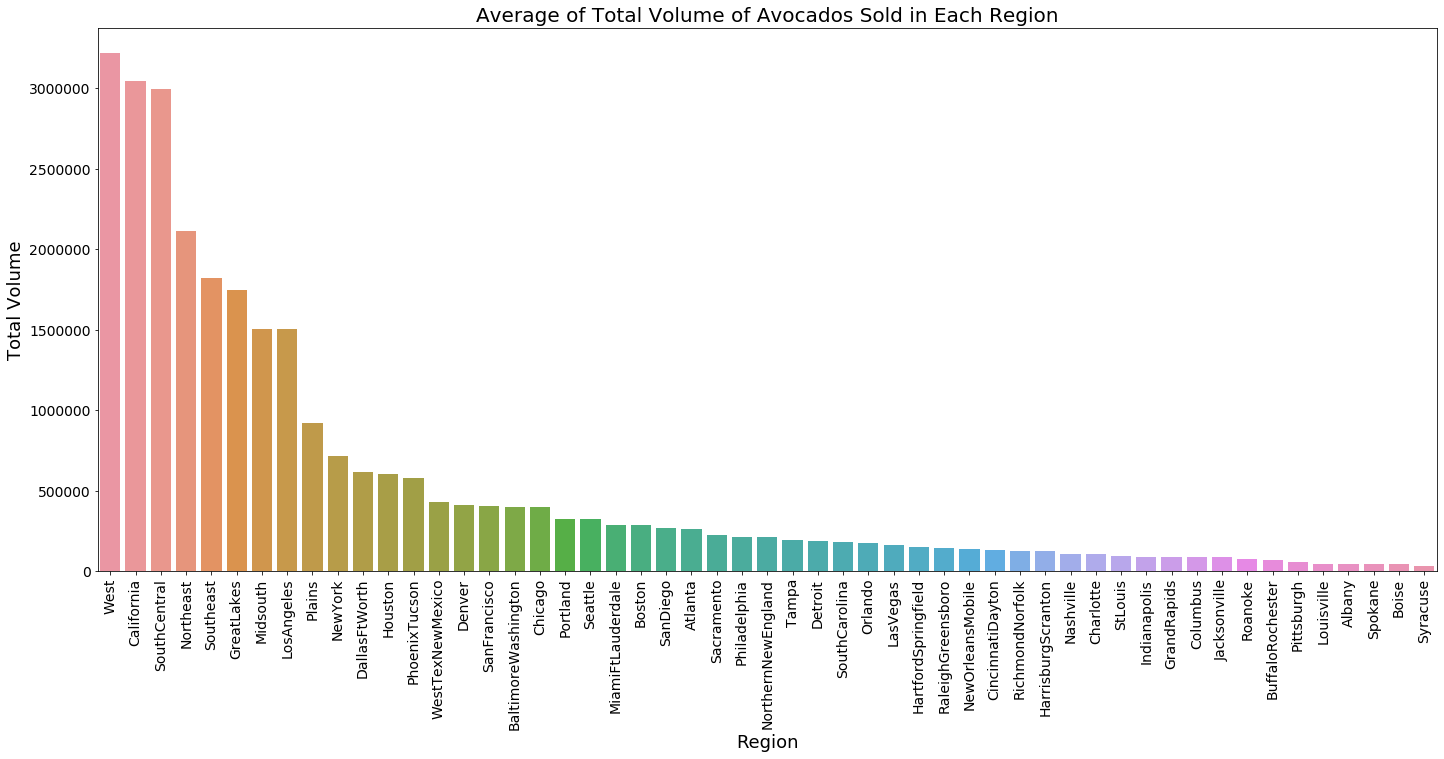

In [86]:
plt.figure(figsize=(24,10))
sns.barplot(data=region_vol, 
            x='region', 
            y='Total Volume', 
            order=region_vol.sort_values('Total Volume', ascending=False).region
            )
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.xlabel('Region', size=18)
plt.ylabel('Total Volume', size=18)
plt.title('Average of Total Volume of Avocados Sold in Each Region', size=20)